In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [4]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot a set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

# Introduction

This chapter is quite heavy by its size and its content but I did what I could to make it more intuitive and visual. We will see how to represent systems of equations graphically, how to interpret the number of solutions of a system, what is linear combination and more. As usual, we will use Numpy/Matplotlib as a tool to experiment these concepts and hopefully gain a more concrete understanding.

# 3.4 Linear Dependence and Span
## Quick recap of a linear system

In our last lesson, we saw that a system of linear equations can be represented in matrix form as:

$$\bs{Ax}=\bs{b}$$

This corresponds to:

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

Recall that, for matrix $\bs{A}$, the $m$ represents the number of equations in our system while the $n$ represents the number of variables. 

Recall also that, since we know $A_{1,1}...A_{m,n}$ and $b_1...b_n$, we can solve the system by finding the values of the variables $x_1...x_n$ that satisfy all of the equations in the system.

# Number of solutions

The first thing to ask when we confront a system of equations is: What is the number of solutions?

There are three possible answers to this question:
 
 1. No solution
 2. 1 solution
 3. An infinite number of solutions
 
## Why there can't be more than 1 solution and less than an infinite number of solutions

### Intuition

If you think again about the geometric representation of a linear system, you'll realize that two plus lines can't intersect each other more than once!

To be able to visualize this, let's take two dimensions (i.e. two variables) and two equations (i.e. two lines). The solution of each system corresponds to the intersection of the lines. 


<img src="images/number-solutions-system-equations.png" width="700" alt="Examples of systems of equations with 0, 1 and an infinite number of solutions" title="System of equations with 0, 1 and an infinite number of solutions">
<em>A system of equations has no solution, 1 solution or an infinite number of solutions</em>


As you can see, 
- There's no solution for parallel lines.
- There's one solution when the lines intersect.
- There's an infinite number of solutions if the lines are superimposed.

### A more rigorous proof

Let's imagine that vectors $\bs{x}$ and $\bs{y}$ are two sets of solutions to our system. This means that

$$
\begin{cases}
\bs{Ax}=\bs{b}\\\\
\bs{Ay}=\bs{b}
\end{cases}
$$

If there are two solutions, our intuition should also tell us that there are infinite solutions. 

To prove this, let's propose a new solution vector called $\bs{z}$. And let's say $\bs{z}=\alpha \bs{x} + (1-\alpha \bs{y})$, where $\alpha$ can take on any value to represent an infinte number of possibel values for $\bs{z}$.

If we can show that $\bs{Az}=\bs{b}$, then we can prove an infinite number of solutions. 

So, let's plug $\bs{z}$ into the lefthand side of our equation:

$$
\begin{align*}
\bs{Az}&=\bs{A}(\alpha x + (1-\alpha y))\\\\
    &=\bs{Ax}\alpha + \bs{A}(1-\alpha y)\\\\
    &=\bs{Ax}\alpha + \bs{Ay}(1-\alpha)
\end{align*}
$$

Since $\bs{Ax}=\bs{Ay}=\bs{b}$, we can substitute the values and obtain:

$$
\begin{align*}
\bs{Az}&=\bs{b}\alpha + \bs{b}(1-\alpha)\\\\
    &=\bs{b}\alpha + \bs{b}-\bs{b}\alpha\\\\
    &=\bs{b}
\end{align*}
$$

Hence $\bs{z}$ is also a solution. And since $\bs{z}$ contained $\alpha$, we have an infinite number of solutions.

# Matrix representation of the system

As we saw in the last lesson, the equation $\bs{Ax}=\bs{b}$ can be represented by a matrix $\bs{A}$ containing the weigths of each variable and a vector $\bs{x}$ containing each variable. The dot product of $\bs{A}$ and $\bs{x}$ gives $\bs{b}$, which is is another vector of size $m$ that represents the solutions:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$

Performing that dot product, we get the system of linear equations written in the more familiar standard form: 

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

If we think about this geometrically again, the number of columns in $\bs{A}$ corresponds to the number of dimensions in our vector space. In other words, $n$ is the number of directions we can travel through the vector space. This is important because the number of solutions to our linear system corresponds to the number of ways we can reach $\bs{b}$ by travelling through our $n$ dimensions.

To more fully appreciate this, let's take a look at two visual approaches to using matrices to represent and solve a system of linear equations: ***the row figure*** and ***the column figure***.

# Graphical views: Row and column figures

If you watch [this video lesson of MIT mathematician Gilbert Strang](http://ia802205.us.archive.org/18/items/MIT18.06S05_MP4/01.mp4), you'll see a very nice explanation of the intuition behind solving linear systems with linear algebra. Or, you can just keep reading.

Take a look at matrix $\bs{A}$:

$$
\bs{A}=\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

Now consider its rows and columns separately. 

> Each row represents the coefficients for each variable from one equation. 

> And each column contains the coefficients for one variable in particular.

The important thing is that you can graphically represent a linear system two ways:  either row-wise or column-wise. 

## Graphical view 1: the row figure

The row figure is typically more familiar because it is the representation we're used to. By looking each row, we're essentially looking at one equation at a time and trying to plot it. 

And remember, we said that the solution to a linear system is the set of values $x_1...x_n$ that satisfies all equations. This is straightforward in the case of $\bs{A}$ being a ($2 \times 2$) matrix ($n=m=2$) since the equations correspond to lines in a $2$-dimensional space and the solution of the system is the intersection of these lines. But sometimes our linear systems aren't so convenient...

### Overdetermined and underdetermined systems
So far, we've been considering convenient situations where our linear systems can be represented as square matrices, i.e. there is the same number of equations as unknowns.

But, more formally, a linear system can be viewed as a set of $(n-1)$-dimensional [hyperplanes](https://en.wikipedia.org/wiki/Hyperplane) in an *n*-dimensional space. So the linear system can be characterized by its number of equations ($m$) and its number of unknown variables ($n$).

- If there are more equations than unknows, the system is called **overdetermined**. In the following example we can see a system of 3 equations (represented by 3 lines) and 2 unknowns (corresponding to 2 dimensions). In this example there is no solution since there is no point belonging to the three lines:

<img src="images/overdetermined-system-linear-equations.png" width="300" alt="Example of an overdetermined system of linear equations with no solution" title="Example of an overdetermined system of linear equations with no solution">
<em>Example of an overdetermined system of linear equations with no solution</em>

- If there are more unknowns than equations, the system is called **underdetermined**. In the following picture, there is only 1 equation (1 line) and 2 dimensions. Each point that is on the line is a solution of the system. In this case, there is an infinite number of solutions:

<img src="images/underdetermined-system-linear-equations.png" width="300" alt="Example of an underdetermined system of linear equations with an infinite number of solutions" title="Example of an underdetermined system of linear equations with an infinite number of solutions">
<em>Example of an underdetermined system of linear equations with an infinite number of solutions</em>


Let's see a few examples of these different cases to clarify that.

### Example 1. 

$m=1$, $n=2$: **1 equation and 2 variables**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1
$$

The graphical interpretation of $n=2$ is that we have a 2-D space. So we can represent it with 2 axes. Since our hyperplane is $n-1$-dimensional, we have a 1-D hyperplane. This is simply a line. As $m=1$, we have only one equation. This means that we have only one line characterizing our linear system.

Note that the last equation can also be written in the more usual slope-intercept form:

$$
y = ax + b
$$

with $y$ corresponding to $x_2$, $x$ corresponding to $x_1$, $a$ corresponding to $A_{1,1}$ and $A_{1,2}=1$.

For this first example we will take the following equation:

$$
y = 2x + 1
$$

Let's draw the line of this equation:

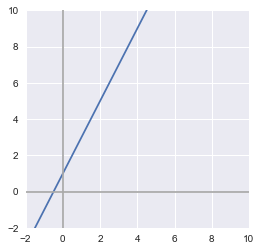

In [5]:
x = np.arange(-10, 10)
y = 2*x + 1

plt.figure()
plt.plot(x, y)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

#### Solutions

The solutions of this linear system correspond to the values of $x$ and $y$ such as $y=2x+1$. Graphically, it corresponds to each point on the line, which means there is an infinite number of solutions. For instance, one solution is $x=0$ and $y=1$, or $x=1$ and $y=3$ and so on.

### Example 2.

*m*=2, *n*=2: **2 equations and 2 unknowns**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

The graphical interpretation of this system is that we still have lines in a 2-D space. However this time there are 2 lines since there are 2 equations.

Let's take these equations as example:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}
$$


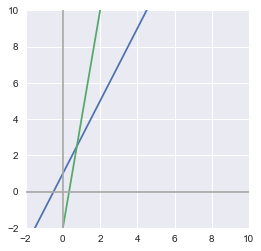

In [6]:
x = np.arange(-10, 10)
y = 2*x + 1
y1 = 6*x - 2

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

In the figure above, the two lines intersect so there is just one unique solution. If they were superimposed (i.e. the same equation or equivalent), then there would be an infinite number of solutions. If they were parallel, there would be no solution.

### Example 3.

*m*=3, *n*=2: **3 equations and 2 unknowns**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2\\\\
A_{3,1}x_1 + A_{3,2}x_2 = b_3
$$

The same idea stands with more than 2 equations in a 2-D space. In that example we have the following 3 equations:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2\\\\
y = \frac{1}{10}x+6
\end{cases}
$$

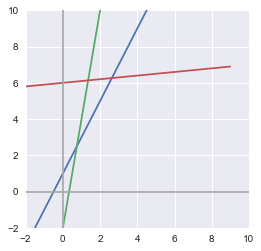

In [7]:
x = np.arange(-10, 10)
y = 2*x + 1

y1 = 6*x - 2
y2 = 0.1*x+6

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

In the case above, there are 3 equations but no solution because there is no point in space that is on each of these lines.

### Drawbacks of the row figure
How far can we extend these plotting techniques? If we try to look at the row figures of linear systems with higher values of $m$ (the number of equations) and $n$ (the number of dimensions), we'll very quickly encounter higher dimensional spaces and higher dimensional hyperplanes that are beyond human comprehension. I mean, how could we possibly visualize a 9-dimensional shape!? As you can imagine, solving linear systems with the row figure approach becomes very difficult very quickly!

## Linear combination (a prerequisite for the column figure)

Before introducing the column figure, we need to talk about **linear combination**. 

If we're working with just 2 vectors, their linear combination corresponds to their weighted sum.

### Example 4.

Let's take two vectors

$$
\vec{u}=
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

and

$$
\vec{v}=
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

These two vectors have 2 dimensions and thus contain coordinates in 2-D space.


The linear combination of $\vec{u}$ and $\vec{v}$ is

$$
a\vec{u}+b\vec{v}= a
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} + b\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

with $a$ and $b$ being the weights we're applying to the vectors.

Graphically, the vectors are added to reach a specific point in space. For example if $a=2$ and $b=1$:

$$
2\vec{u}+\vec{v}= 2
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} +
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix} =
\begin{bmatrix}
    2 \cdot 1 + 2 \\\\
    2 \cdot 3 + 1
\end{bmatrix} =
\begin{bmatrix}
    4 \\\\
    7
\end{bmatrix}
$$

The sum of $\vec{u}$ and $\vec{v}$ is a vector that will reach the point of corrdinates $(4, 7)$. To show that on a plot, I will use the custom function `plotVectors()` that we defined at the beginning of the notebook. It takes a set of coordinates and an array of colors as input and plots the corresponding vectors. So let's plot $\vec{u}$ and $\vec{v}$:

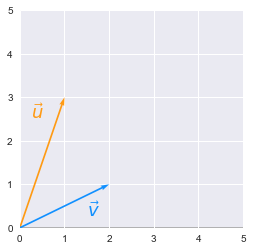

In [8]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors([[1, 3], [2, 1]], [orange, blue])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.text(0.25, 2.5, r'$\vec{u}$', color=orange, size=18)
plt.text(1.5, .25, r'$\vec{v}$', color=blue, size=18)

We will now add these vectors and their weights. This gives:

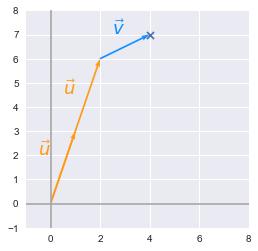

In [9]:
# Weigths of the vectors
a = 2
b = 1
# Start and end coordinates of the vectors
u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], a*u[0], b*v[0]],
           [u[1], a*u[1], b*v[1]],
           [u[2], a*u[2], b*v[2]],
           [u[3], a*u[3], b*v[3]],
           angles='xy', scale_units='xy', scale=1, color=[orange, orange, blue])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
# Draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(4,7,marker='x',s=50)
# Draw the name of the vectors
plt.text(-0.5, 2, r'$\vec{u}$', color=orange, size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color=orange, size=18)
plt.text(2.5, 7, r'$\vec{v}$', color=blue, size=18)

Above, we weighted $\vec{u}$ twice and $\vec{v}$ just once. With these weights, the linear combination of $\vec{v}$ and $\vec{u}$ resulted in a new vector comprised of the coordinates ($4$, $7$).

## Span (another prerequisite for the column figure)

Take the vectors $\vec{u}$ and $\vec{v}$ from the previous example and think about all the points you can reach by their combination with changing values of $a$ and $b$. This set of points is called the **span** of the set of vectors $\{\vec{u}, \vec{v}\}$.

### A more formal span definition
More formally, given a set of vectors $A:=\{\vec{a}_{1},\ldots,\vec{a}_{k}\}$ in $\mathbb{R}^{n}$, consider all of the new vectors that we could create through linear combinations.

New vectors created in this manner are called linear combinations of $A$.

Specifically, $y \in \mathbb R ^n$ is a linear combination of $A:=\{\vec{a}_{1},\ldots,\vec{a}_{k}\}$ if:

$$y = \beta_1 a_1 + \cdots + \beta_k a_k
\text{ for some scalars } \beta_1, \ldots, \beta_k$$

Above,, the values $\beta_1, \ldots, \beta_k$ are called the coefficients of the linear combination. They're synonymous with $a$ and $b$ from above. 

It is the set of linear combinations of $A$ that we call the **span** of $A$.

In the figure we plot below, we'll see the span of $A = \{a_1, a_2\}$ in $\mathbb{R}^{3}$.

The span is a $2$-dimensional plane passing through these two points and the origin.

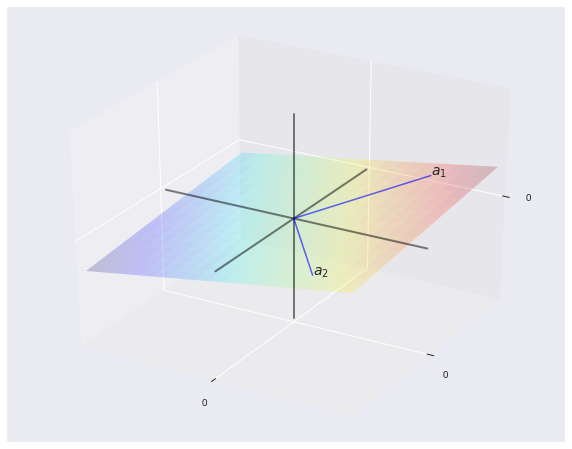

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
#plt.show()

>### A note on spaces and subspaces
>Above, you saw some new math terminology:  

>$$\mathbb{R}^n$$

>Let's talk about that.

>The **space** of a vector determines all of the values that can be taken by this vector. The vector spaces are denoted $\mathbb{R}$ because the values are [real numbers](https://en.wikipedia.org/wiki/Real_number). If there are multiple dimensions, the space is denoted $\mathbb{R}^n$ with $n$ corresponding to the number of dimensions. For instance $\mathbb{R}^2$ is the space of the usual $x$-$y$ plane where $x$ and $y$ values are real numbers.

>If you take a 2-dimensional plane in $\mathbb{R}^3$ (3-dimensional space), this plane is a **subspace** of your original $\mathbb{R}^3$ space. In the same manner, if you start with a $\mathbb{R}^2$ space and take a line in this space, this line is a subspace of the original space.

>A linear combination of vectors gives vectors in the original space. Every linear combination of vectors inside a space will stay in this space. For instance, if you take 2 lines in a $\mathbb{R}^2$ space, any linear combination will give you a vector in the same $\mathbb{R}^2$ space.


>**The important takeaway is that a linear combination of vectors returns a vector in the original space.**

## Graphical view 2: the column figure

OK, now we're ready to see how it's possible to represent a linear system by looking at the columns. Specifically, we'll see that the solution vector $\bs{b}$ corresponds to a linear combination of each column multiplied by its weights.

From the set of equations:

$$
A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_m
$$

The column form is then:

$$
x_1
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}\\\\
    A_{m,1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}\\\\
    A_{m,2}
\end{bmatrix}
+ 
x_n
\begin{bmatrix}
    A_{1,n}\\\\
    A_{2,n}\\\\
    A_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\\\
    b_2\\\\
    b_m
\end{bmatrix}
$$

Thinking graphically, the task is to travel from the origin (zero on every dimension) to the point of represented by the coordinates in $\bs{b}$. **The columns of $\bs{A}$ give us the directions we ought to travel by while their weights represent how far we go in that direction.**

### Example 5. 
Let's take a case when $m=n=2$:
$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

And let's start with two equations in slope-intercept form that are then converted to standard form:

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4
\end{cases}
$$

And then converted to matrix form in $\bs{A}$:

$$
\bs{A}=
\begin{bmatrix}
    \frac{1}{2} & -1 \\\\
    1 & 1
\end{bmatrix}
$$

The column figure gives us:

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

The goal is to find the value of the weights ($x$ and $y$) for which the linear combination of the vector

$$
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

gives the vector 

$$
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

Let's first solve this system graphically using the row figure. We'll plot the equations and simply look for their intersection:

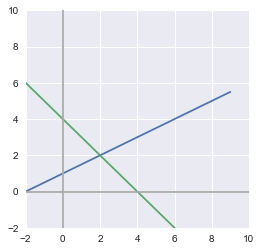

In [14]:
x = np.arange(-10, 10)
y = 0.5*x + 1

y1 = -x + 4

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

We can see that the solution (the intersection of the two lines) is $x=2$ and $y=2$. This means that the linear combination is the following:

$$
2
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
2
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

So let's say that

$$
\vec{u}=
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

and

$$
\vec{v}=
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

The column figure approach says that we can reach the point of intersection $(-1, 4)$ if we add two times the vector $\vec{u}$ and two times the vector $\vec{v}$. Let's check that:

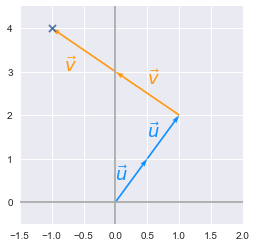

In [15]:
u = [0,0,0.5,1]
u_bis = [u[2],u[3],u[2],u[3]]
v = [2*u[2],2*u[3],-1,1]
v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]

plt.quiver([u[0], u_bis[0], v[0], v_bis[0]],
           [u[1], u_bis[1], v[1], v_bis[1]],
           [u[2], u_bis[2], v[2], v_bis[2]],
           [u[3], u_bis[3], v[3], v_bis[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, blue, orange, orange])
# plt.rc('text', usetex=True)
plt.xlim(-1.5, 2)
plt.ylim(-0.5, 4.5)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-1,4,marker='x',s=50)
plt.text(0, 0.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 1.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 2.7, r'$\vec{v}$', color=orange, size=18)
plt.text(-0.8, 3, r'$\vec{v}$', color=orange, size=18)
plt.show()
plt.close()

And there you have it! We arrived at the point ($-1$, $4$).

## Determine if the system has one and only one solution for every value of $\bs{b}$

We will now see how to determine if a system of equations has one and only one solution. *Note that this only applies to the [general cases](https://en.wikipedia.org/wiki/System_of_linear_equations#General_behavior), like those we discussed above.* For us, this means our system must meet two requirements:

1. The system must have at least one solution
2. Then, the system must have **only** one solution

### Requirement 1. Overdetermined system: the system must have at least one solution for each value of $\bs{b}$: $m\geq n$

Recall that **an overdetermined system of equations is a system with more equations than unknowns.**

The column figure helps us understand why a linear system usually has no solution when $n$ (the number of unknowns) is smaller than $m$ (the number of equations). Let's add 1 equation to the system we worked above in order to end up with a ($3\times2$) matrix (3 equations and 2 unknowns):

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4\\\\
y = 7x + 2
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4\\\\
7x-y=2
\end{cases}
$$

This corresponds to:

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1 \\\\
    7
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4 \\\\
    2
\end{bmatrix}
$$

Graphically, this means we are still traveling in our $2$-dimensional space (see the plot of the column space above), but the point that we are looking for is defined by $3$ dimensions. If this third coordinate does not rely on our $2$-dimensional $x$-$y$ plane, then no solution exists.

### Linear dependence

As we've seen, the number of columns provides us with information on the number of solutions. But for an overdetermined system, the true number that we have to take into account is the number of **linearly independent** columns. Columns are linearly dependent if one of them is a linear combination of the others. Thinking graphically in terms of the column figure, this means the direction of two linearly dependent vectors is the same. This means that the column doesn't add a dimension that we can use to travel by and reach $\bs{b}$.

Here is an example of a linear system that exhibits linear dependency:

$$
\begin{cases}
y = 2x+6\\\\
y = 2x
\end{cases}
\Leftrightarrow
\begin{cases}
2x-y = -6\\\\
2x-y=0
\end{cases}
$$

Let's first look at the row figure to clearly show that the system has no solution:

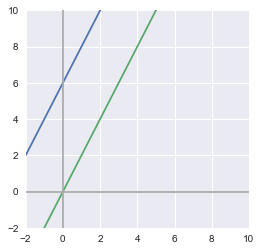

In [16]:
x = np.arange(-10, 10)
y = 2*x + 6

y1 = 2*x

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

Since the lines are parallel, they will never intersect and therefore there is no solution.

The column figure illustrates the point as well:

$$
x
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\\\
    0
\end{bmatrix}
$$


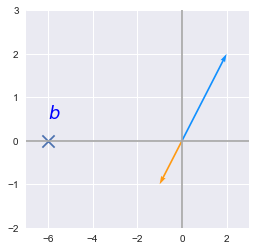

In [17]:
u = [0,0,2,2]
v = [0,0,-1,-1]

plt.quiver([u[0], v[0]],
           [u[1], v[1]],
           [u[2], v[2]],
           [u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, orange])
plt.xlim(-7, 3)
plt.ylim(-2, 3)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-6,0,marker='x',s=150)
plt.text(-6, 0.5, r'$b$', color='b', size=18)
plt.show()
plt.close()

We would like to go to $b$ but the only path we can take is along the blue/orange line. The second equation doesn't provide us with a new direction to take since it is just a linear combination of the first one.

### Requirement 2. Underdetermined system: the system must have **only** one solution for each value of $\bs{b}$: $n=m$

Recall that **an underdetermined system of equations is a system with less equations than unknowns.**

The other requirement is that $n$ (the number of unknowns) must not be less than $m$ (the number of equations). But if we want our system to have one and only one solution, a second requirement is that $n$ must not be bigger than $m$.

Let's take the example of a ($2\times 3$) matrix that corresponds to a set of 2 equations with 3 unknowns variables:


$$
\begin{cases}
8x+y+z=1\\\\
x+y+z=1
\end{cases}
$$

$$
x
\begin{bmatrix}
    8 \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
+
z
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$

Here is the representation of the planes plotted with the help of this [website](https://technology.cpm.org/general/3dgraph/):

<img src="images/intersection-2-planes-line.png" alt="Plot showing two planes. The intersection of the two planes is a line" title="The intersection of the two planes is a line" width="500">
<em>The intersection of the two planes is a line</em>

We can at least see that the two planes are not parallel, and so there are solutions to the set of equations. This meets our first requirement. 

But, when it comes to our second requirement, we can see that there is an infinite number of points of intersection (the intersection of the planes is a line). We would need a third plane to have a unique solution.

The takeaway is is that linear systems need a **square matrix** $\bs{A}$ ($m=n$) with **linearly independant columns** in order to have a unique solution for every values of $\bs{b}$.

Furthermore, to connect this to our earlier lesson about the inverse of a matrix, we can say that the inverse of a matrix representing a linear system only exists if the set of equations has one and only one solution for each value of $\bs{b}$. Why? Because:

- The matrix $\bs{A}$ cannot have more than 1 inverse. Imagine that $\bs{A}$ has 2 inverses $\bs{B}$ and $\bs{C}$ such as $\bs{AB}=\bs{I}$ and $\bs{AC}=\bs{I}$. This would mean that $\bs{B}=\bs{C}$.

- The solution of the system $\bs{Ax}=\bs{b}$ is $\bs{x}=\bs{A} ^{-1} \bs{b}$. So if there are multiple solutions, there are multiple inverses and the first point is not met.

# References

## Books and videos of Gilbert Strang

- Strang, G. (2006). Linear Algebra and Its Applications, 4th Edition (4th edition). Belmont, CA: Cengage Learning.

- Strang, G. (2014). Differential Equations and Linear Algebra (UK ed. edition). Wellesley, Mass: Wellesley-Cambridge.

- [The column space of a matrix. Video from Gilbert Strang](https://ocw.mit.edu/resources/res-18-009-learn-differential-equations-up-close-with-gilbert-strang-and-cleve-moler-fall-2015/differential-equations-and-linear-algebra/vector-spaces-and-subspaces/the-column-space-of-a-matrix/)

## System of equations

- [Wikipedia - System of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations)

## Numpy

- [Numpy arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)